# Classification (분류)
___
##SVM (Support Vector Machine)
✔️ 보편적으로 사용된 분류 머신 러닝 모델 <br>
✔️ 주어진 데이터를 기반으로 새로운 데이터가 어느쪽인지 판단하는 모델을 만들고 **경계**를 구함 


### SVM 구성요소 
- Hyper plane(초평면)
  - 두 그룹을 나누는 경계선 
  - 특징(feature)의 수 보다 한 차원 낮음 

- Support vector
  - 경계에서 <u>가장 가까운</u> 각 클래스의 데이터의 점 

- Margin 
  - 초평면과 써포트 벡터까지의 <u>수직 거리</u> <br>
  Margin = $\frac{2}{\sqrt{w_1i^2 + w_2^2}} $



### SVM의 목표 
1. 벡터 공간에서 학습 데이터가 속한 **2개의 그룹** 을 분류하는 <span style ='color: red'>선형 분리자 </span> 를 찾는다. 
  -  2개의 그룹을 가장 멀리 구분할 수 있는 선형 분리자 
  - Soft Margin (소프트 마진)
    - 약간의 벗어남은 허용한다

2. 선형 분류가 불가능한 현재공간을 **한 차원 높은 공간으로 변환** 하여 선형 분류가 가능하게 분포되는 공간으로 변환하여 분리 
  - Kernel trick (커널 트릭)
    - 다항 커널 
    - 가우시안 커널



In [1]:
import numpy as np
from sklearn import svm

In [3]:
X = np.array([[0,0], [1,1]])
y = [0,1]

In [5]:
# 선형 SVM 선언 및 데이터 학습 (선형분류)
LinearSVM = svm.LinearSVC()
LinearSVM.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
# 선형 SVM 학습 결과 확인 
LinearSVM.predict([[2,2]])

array([1])

In [7]:
print(LinearSVM.coef_[0])
print(LinearSVM.intercept_[0])

[0.58823254 0.58823254]
-0.47058135542107304


학습된 선형 공식 ✔️ <br>
$ y = 0.59x_1 + 0.59x_2 - 0.47 $

In [8]:
# 선형 SVM의 초평면 그려보기
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

[0.58823254 0.58823254]


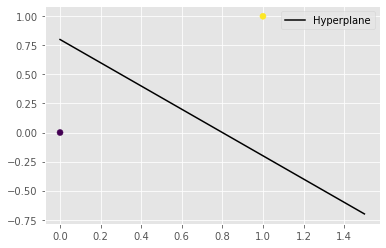

In [9]:
w = LinearSVM.coef_[0]
print(w)
b = LinearSVM.intercept_[0]
slope = -w[0] /w[1]
xx = np.linspace(0, 1.5)
yy = slope * xx - b/w[1]
h0 = plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:,1], c=y)
plt.legend()
plt.show()

## 비선형 SVM : XOR 문제 

In [10]:
# 데이터 준비
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = [0, 1, 1, 0]

In [13]:
# 선언 및 학습 
# 필요한 커널및 차원 조절은 자동적으로 진행 
SVM_XOR = svm.SVC()
SVM_XOR.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
# 새로운 데이터 예측 
test_data = np.array([[0.8, 0.8],[0.2, 0.9]])
SVM_XOR.predict(test_data)

array([0, 1])